In [67]:
import pandas as pd
import numpy as np
import seaborn as sb
import pylab as py
import matplotlib.pyplot as plt
import sklearn.model_selection as mods
import sklearn.linear_model as sklin
import sklearn.tree as st
#import xgboost as xgb


In [68]:
df=pd.read_csv('c:/temp/TestPredictionResults/TestPredictionResults_23-03-19_06-08-06.csv')

In [69]:
df.head()

,TestProgram_Name_NA,Family,IsConcurrent,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_SubmitterFullName_NA,ITuff_Lot_NA,ituff_EndDate_NA,ITuff_PartType_FromSpark,ITuff_BomGroup_FromSpark,ITuff_ProcessStep_FromSpark,ITuff_ExperimentType_FromSpark,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
0,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,357.691731
1,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,363.206417
2,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,363.616004
3,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,357.596088
4,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,367.486744


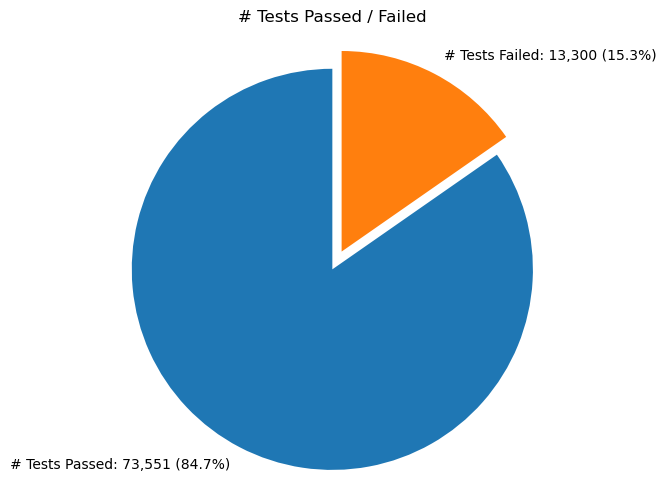

In [70]:
# Graph of Tests Passed / Failed

# data on number of tests passed and failed
testFailureData = {'# Tests Passed': len(df[df['ITuff_PerUnit_IsPassed_Target_NA'] == True]), '# Tests Failed': len(df[df['ITuff_PerUnit_IsPassed_Target_NA'] == False])}

# Convert the dictionary to a pandas DataFrame
df1 = pd.DataFrame.from_dict(testFailureData, orient='index', columns=['Tests'])

# create a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
explode = (0.1, 0)  # explode the first slice

# calculate the percentages and display them on the chart
percentages = df1['Tests'] / df1['Tests'].sum() * 100
labels = [f'{df1.index[i]}: {df1.Tests[i]:,.0f} ({percentages[i]:.1f}%)' for i in range(len(df1))]
ax.pie(df1['Tests'], explode=explode, labels=labels, autopct='', startangle=90)
ax.axis('equal')

# set the title of the chart
plt.title('# Tests Passed / Failed')

# display the chart
plt.show()


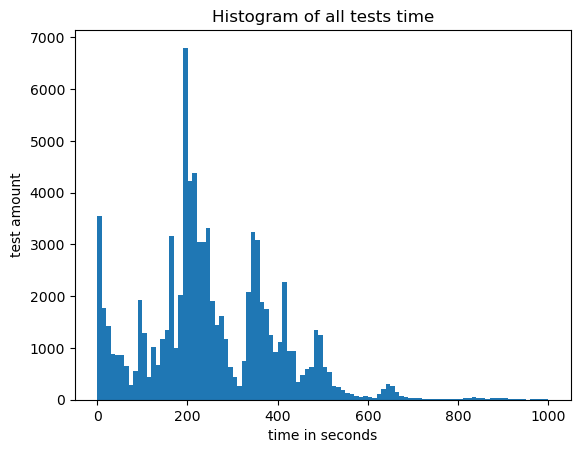

In [71]:
# all tests time histogrm
all_tests_time = df[df['ITuff_PerUnit_testTimeInMS_Target']<1000]
plt.hist(all_tests_time['ITuff_PerUnit_testTimeInMS_Target'], bins=100)

# Add labels and titles
plt.xlabel('time in seconds')
plt.ylabel('test amount')
plt.title('Histogram of all tests time')

# Show the plot
plt.show()

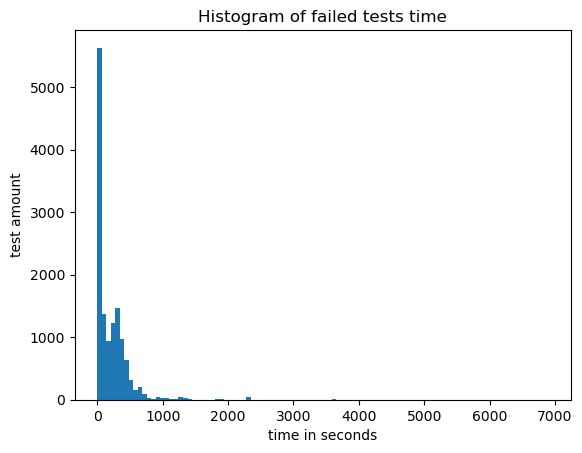

In [72]:
# failed tests time histogrm

failed_records = df[df['ITuff_PerUnit_IsPassed_Target_NA'] == False]

plt.hist(failed_records['ITuff_PerUnit_testTimeInMS_Target'], bins=100)

# Add labels and titles
plt.xlabel('time in seconds')
plt.ylabel('test amount')
plt.title('Histogram of failed tests time')

# Show the plot
plt.show()

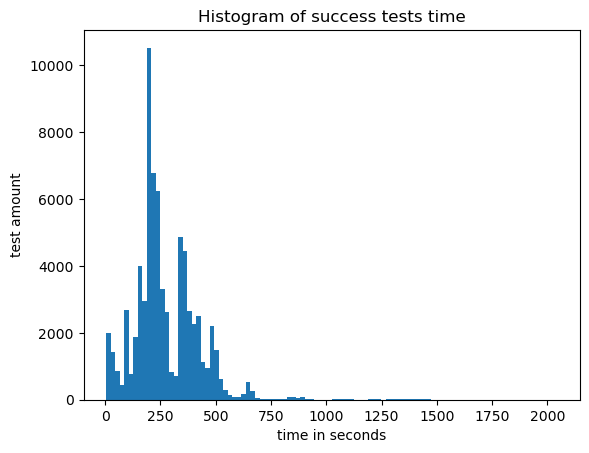

In [73]:
# success tests time histogrm

success_records = df[df['ITuff_PerUnit_IsPassed_Target_NA'] == True]

plt.hist(success_records['ITuff_PerUnit_testTimeInMS_Target'], bins=100)

# Add labels and titles
plt.xlabel('time in seconds')
plt.ylabel('test amount')
plt.title('Histogram of success tests time')

# Show the plot
plt.show()

In [74]:
min_time = 100
max_time = 550

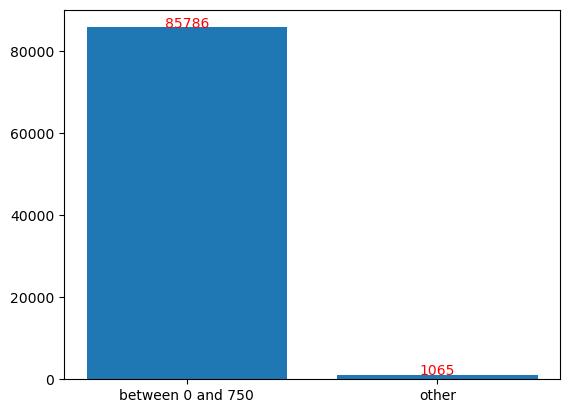

In [75]:
# add graph of how many above max_time

total = len(df['ITuff_PerUnit_testTimeInMS_Target'])

filtered_by_min_and_max = df[(df['ITuff_PerUnit_testTimeInMS_Target'] > max_time) | (df['ITuff_PerUnit_testTimeInMS_Target']< min_time)]
count = len(filtered_by_min_and_max)
#print(len(df[df['ITuff_PerUnit_testTimeInMS_Target'] > max_time]))

categories = ['between '+str(min_time) + ' and ' +str(max_time), 'other']
values = [total-count, count]

# Set up the figure and axis
fig, ax = plt.subplots()

# Set the x-axis ticks and labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)

# Create the bar plot
ax.bar(range(len(categories)), values)

# Add values to the bars
for i, val in enumerate(values):
    ax.text(i, val + 0.5, str(val), ha='center', fontsize=10, color='red')

# Show the plot
plt.show()

In [76]:
print(len(filtered_by_min_and_max))
df = df.drop(filtered_by_min_and_max.index)

1065


In [77]:
#sb.pairplot(df.head(5)) # after dummies

In [78]:
#sb.displot(df['Shmoo_tests_count'])

In [79]:
df.corr()

,IsConcurrent,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
IsConcurrent,1.000000,-0.029562,0.396434,NaN,0.999870,0.552675,-0.012314,0.037209,0.367589
Patterns_Count,-0.029562,1.000000,0.769134,NaN,-0.029474,0.303540,-0.083946,0.098753,0.340750
Tests_Count,0.396434,0.769134,1.000000,NaN,0.396461,0.750347,-0.066652,0.112734,0.500776
Mtt_Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConcurrentFlows_Count,0.999870,-0.029474,0.396461,NaN,1.000000,0.552238,-0.012604,0.037141,0.367042
Shmoo_tests_count,0.552675,0.303540,0.750347,NaN,0.552238,1.000000,0.012901,0.063186,0.490218
ITuff_Temperature_NA,-0.012314,-0.083946,-0.066652,NaN,-0.012604,0.012901,1.000000,-0.098189,0.232371
ITuff_PerUnit_IsPassed_Target_NA,0.037209,0.098753,0.112734,NaN,0.037141,0.063186,-0.098189,1.000000,0.235483
ITuff_PerUnit_testTimeInMS_Target,0.367589,0.340750,0.500776,NaN,0.367042,0.490218,0.232371,0.235483,1.000000


In [80]:
df.describe()

,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_PerUnit_testTimeInMS_Target
count,85786.000000,85786.000000,85786.0,85786.000000,85786.000000,85786.000000,85786.000000
mean,16043.092276,12155.740459,0.0,1.455599,252.133495,64.618178,252.616304
std,6486.302086,4371.999030,0.0,1.498963,157.596634,47.931907,141.803781
min,245.000000,443.000000,0.0,0.000000,0.000000,-5.000000,0.576587
25%,15938.000000,13065.000000,0.0,0.000000,216.000000,0.000000,167.491825
50%,17422.000000,13429.000000,0.0,0.000000,239.000000,100.000000,229.028169
75%,20269.000000,14787.000000,0.0,3.000000,313.000000,100.000000,353.199156
max,57800.000000,19752.000000,0.0,3.000000,589.000000,100.000000,749.855810


In [81]:
df.groupby('IsConcurrent').count()

,TestProgram_Name_NA,Family,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_SubmitterFullName_NA,ITuff_Lot_NA,ituff_EndDate_NA,ITuff_PartType_FromSpark,ITuff_BomGroup_FromSpark,ITuff_ProcessStep_FromSpark,ITuff_ExperimentType_FromSpark,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
IsConcurrent,,,,,,,,,,,,,,,,,
False,44146,44146,44146,44146,44146,44146,44146,44146,44146,44146,44146,44146,44146,44146,44146,44146,44146
True,41640,41640,41640,41640,41640,41640,41640,41640,41640,41640,41640,41640,41640,41640,41640,41640,41640


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85786 entries, 0 to 86850
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TestProgram_Name_NA                85786 non-null  object 
 1   Family                             85786 non-null  object 
 2   IsConcurrent                       85786 non-null  bool   
 3   Patterns_Count                     85786 non-null  int64  
 4   Tests_Count                        85786 non-null  int64  
 5   Mtt_Count                          85786 non-null  int64  
 6   ConcurrentFlows_Count              85786 non-null  int64  
 7   Shmoo_tests_count                  85786 non-null  int64  
 8   ITuff_Temperature_NA               85786 non-null  int64  
 9   ITuff_SubmitterFullName_NA         85786 non-null  object 
 10  ITuff_Lot_NA                       85786 non-null  object 
 11  ituff_EndDate_NA                   85786 non-null  obj

In [83]:
df.drop(['TestProgram_Name_NA','ITuff_Temperature_NA','ITuff_SubmitterFullName_NA','ITuff_Lot_NA', 'ituff_EndDate_NA','ITuff_PerUnit_IsPassed_Target_NA'], axis=1, inplace=True)
#df.drop(['ConcurrentFlows_Count'], axis=1, inplace=True)                # ConcurrentFlows_Count doesn't change result
#df.drop(['IsConcurrent'], axis=1, inplace=True)                         # 'IsConcurrent' doesn’t change result
df.drop(['Family'], axis=1, inplace=True)                               # 'Family' doesn’t change result
#df.drop(['Patterns_Count'], axis=1, inplace=True)                       # Patterns_Count helps a little
#df.drop(['Tests_Count'], axis=1, inplace=True)                         # Tests_Count helps a little
#df.drop(['Shmoo_tests_count'], axis=1, inplace=True)                   # Shmoo_tests_count helps a little
df.drop(['ITuff_BomGroup_FromSpark'], axis=1, inplace=True)
#df.drop(['ITuff_ProcessStep_FromSpark'], axis=1, inplace=True)         # ITuff_ProcessStep_FromSpark is critical
#df.drop(['ITuff_ExperimentType_FromSpark'], axis=1, inplace=True)      # ITuff_ExperimentType_FromSpark helps a little

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85786 entries, 0 to 86850
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsConcurrent                       85786 non-null  bool   
 1   Patterns_Count                     85786 non-null  int64  
 2   Tests_Count                        85786 non-null  int64  
 3   Mtt_Count                          85786 non-null  int64  
 4   ConcurrentFlows_Count              85786 non-null  int64  
 5   Shmoo_tests_count                  85786 non-null  int64  
 6   ITuff_PartType_FromSpark           85786 non-null  object 
 7   ITuff_ProcessStep_FromSpark        85786 non-null  object 
 8   ITuff_ExperimentType_FromSpark     85786 non-null  object 
 9   ITuff_PerUnit_testTimeInMS_Target  85786 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 6.6+ MB


In [85]:
#df = pd.get_dummies(df, columns =['Family'])
df = pd.get_dummies(df, columns =['ITuff_PartType_FromSpark'])
#df = pd.get_dummies(df, columns =['ITuff_BomGroup_FromSpark'])
df = pd.get_dummies(df, columns =['ITuff_ProcessStep_FromSpark'])
df = pd.get_dummies(df, columns =['ITuff_ExperimentType_FromSpark'])


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85786 entries, 0 to 86850
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   IsConcurrent                                85786 non-null  bool   
 1   Patterns_Count                              85786 non-null  int64  
 2   Tests_Count                                 85786 non-null  int64  
 3   Mtt_Count                                   85786 non-null  int64  
 4   ConcurrentFlows_Count                       85786 non-null  int64  
 5   Shmoo_tests_count                           85786 non-null  int64  
 6   ITuff_PerUnit_testTimeInMS_Target           85786 non-null  float64
 7   ITuff_PartType_FromSpark_H64ADNSVAL         85786 non-null  uint8  
 8   ITuff_PartType_FromSpark_H64ADNWVBL         85786 non-null  uint8  
 9   ITuff_PartType_FromSpark_H64AHSFVCC         85786 non-null  uint8  
 10  ITuff_Part

In [87]:
df.describe()

,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_PerUnit_testTimeInMS_Target,ITuff_PartType_FromSpark_H64ADNSVAL,ITuff_PartType_FromSpark_H64ADNWVBL,ITuff_PartType_FromSpark_H64AHSFVCC,ITuff_PartType_FromSpark_H64ALNAVBJ,...,ITuff_ProcessStep_FromSpark_CLASSHOTR,ITuff_ProcessStep_FromSpark_CSM,ITuff_ProcessStep_FromSpark_FUSE,ITuff_ProcessStep_FromSpark_PHMCOLD,ITuff_ProcessStep_FromSpark_PHMCOLDR,ITuff_ProcessStep_FromSpark_PHMHOT,ITuff_ProcessStep_FromSpark_PHMHOTR,ITuff_ExperimentType_FromSpark_Correlation,ITuff_ExperimentType_FromSpark_Engineering,ITuff_ExperimentType_FromSpark_WalkTheLot
count,85786.000000,85786.000000,85786.0,85786.000000,85786.000000,85786.000000,85786.000000,85786.000000,85786.000000,85786.000000,...,85786.000000,85786.000000,85786.00000,85786.000000,85786.000000,85786.000000,85786.000000,85786.000000,85786.000000,85786.000000
mean,16043.092276,12155.740459,0.0,1.455599,252.133495,252.616304,0.000280,0.000058,0.013126,0.055615,...,0.003625,0.030529,0.00387,0.112944,0.010689,0.139277,0.003893,0.556688,0.441879,0.001434
std,6486.302086,4371.999030,0.0,1.498963,157.596634,141.803781,0.016724,0.007634,0.113814,0.229178,...,0.060102,0.172040,0.06209,0.316526,0.102836,0.346237,0.062276,0.496779,0.496613,0.037839
min,245.000000,443.000000,0.0,0.000000,0.000000,0.576587,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15938.000000,13065.000000,0.0,0.000000,216.000000,167.491825,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17422.000000,13429.000000,0.0,0.000000,239.000000,229.028169,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,20269.000000,14787.000000,0.0,3.000000,313.000000,353.199156,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,57800.000000,19752.000000,0.0,3.000000,589.000000,749.855810,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
#df.Family_RaptorLake.value_counts()

In [89]:
#sb.pairplot(df,hue='ITuff_PerUnit_testTimeInMS_Target',)

In [90]:
#plt.hist(df['ITuff_PerUnit_testTimeInMS_Target'])
#plt.show()

In [91]:
#sb.displot(df['ITuff_PerUnit_testTimeInMS_Target']) 

In [92]:
x = df.drop(['ITuff_PerUnit_testTimeInMS_Target'],axis=1)
y = df.ITuff_PerUnit_testTimeInMS_Target

In [93]:
x_train, x_test, y_train, y_test = mods.train_test_split(x, y, test_size=0.30,random_state=101)

In [94]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from xgboost import XGBRegressor

#sklin.LinearRegression
#model = sklin.LinearRegression()

#Ridge
# model = Ridge(alpha=1.0)

#Lasso
#model = Lasso(alpha=0.1)

#model  = ElasticNet(alpha=0.1, l1_ratio=0.5)

#model = BayesianRidge()

model = XGBRegressor()


In [95]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [96]:
y_pred = model.predict(x_test)

In [97]:
print(len(y_pred))

25736


In [98]:
y_check = y_pred / y_test * 100

Text(0, 0.5, 'tests amount')

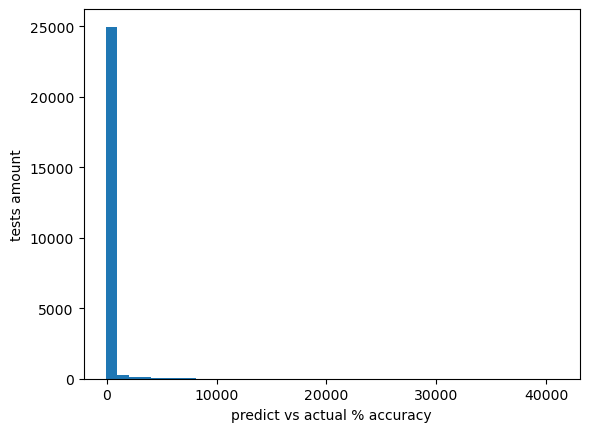

In [99]:
plt.hist(y_check, 40)
plt.xlabel('predict vs actual % accuracy')
plt.ylabel('tests amount')

In [100]:
import matplotlib.pyplot as plt

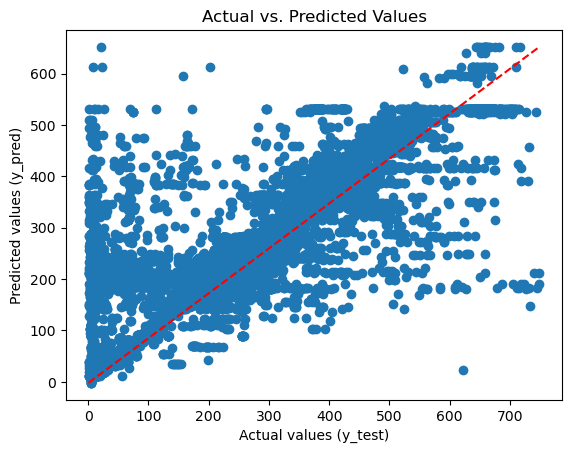

In [101]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)],'--', color='red')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()

In [102]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [103]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# print the results
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)
print("MAE: ", mae)

MSE:  4491.526783477301
RMSE:  67.01885394034504
R-squared:  0.7798337106256646
MAE:  30.62175296618439
